In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import glob

In [2]:
#filename_base = "xp2_migr_20180619084743" # 20, 0
#filename_base="xp2_migr_20180619094324" #20,25
#filename_base="xp2_migr_20180618225904" # 20, 50

experiments = glob.glob("./results/*")

df = None
df_migr = None
df_agent = None

for experiment in experiments:
    filename_base = experiment.split("/")[2]
    experiment=filename_base
    #filename_base="xp2_migr_20180621170259_50_0" # 50 agents, 0 active processes (which are going to be migrated)
    #filename_base="xp2_migr_20180623033156_50_25" # 50,25
    #filename_base="xp2_migr_20180623151601_50_50" #50,50
    test_descriptor=None
    split_experiment = filename_base.split("_")
    if len(split_experiment)<6:
        continue
    if experiment.find("xp1") == -1:
        continue
    
   
    files = glob.glob("./results/{0}/*.csv".format(filename_base))
    print (experiment)
    for f in files:
        
        #print (f)
        filename=os.path.basename(f)
        name = filename.split(".")[0].split("_")
        #print (name)
        if ("_pre_" in filename) or ("_post_" in filename):
            df_tmp = pd.read_csv(f,parse_dates=["start", "end"], sep=",")
            
            df_tmp["experiment"] = filename_base
            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            
            #df_tmp["faban_agent"] = int(name[4])
            df_tmp["tenant"] = name[7]
            df_tmp["bpm"] = split_experiment[5]
            if "_pre_" in filename:
                df_tmp["type"] = "pre"
            if "_post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["taskId"] = df_tmp["task_id"]
            df_tmp["relative_start_tenant"] = (df_tmp["start"] - df_tmp["start"].min()).astype("timedelta64[ms]")
            #df_tmp = df_tmp.set_index(["task_id","type", "agent_nb", "active_process_nb"])
            if df is None:
                df = df_tmp
            else:
                df = pd.concat([df, df_tmp])
        if (len(name) > 4 and (name[6] == "migr")):
            df_tmp = pd.read_csv(f, names = ["ts","nb","duration_disable","duration_move","duration_enable","duration_total"])
            df_tmp["ts"] = pd.to_datetime(df_tmp["ts"])
            df_tmp["experiment"] = filename_base
            df_tmp["bpm"] = split_experiment[5]
            if df_migr is None:
                df_migr = df_tmp
            else:
                df_migr = pd.concat([df_migr, df_tmp])
            
        if filename=="test_descriptor.csv":
            with open(f, mode='r') as infile:
                reader = csv.reader(infile)
                test_descriptor = dict((rows[0],rows[1]) for rows in reader)
        if ("_agent" in filename):
            df_tmp = pd.read_csv(f, sep=",",parse_dates=["Req_retrieve_Time","Resp_retrieve_Time","Req_Assign_Tim","Resp_Assign_Time","Req_exec_Time","Resp_exec_Time","Retrive_Time","Assign_Time","Exec_Time"])
            df_tmp["experiment"] = filename_base
            if "pre_" in filename:
                df_tmp["type"] = "pre"
            if "post_" in filename:
                df_tmp["type"] = "post"
            #df_tmp["agent_nb"] = int(split_experiment[3])
            #df_tmp["active_process_nb"] = int(split_experiment[4])
            #df_tmp["faban_agent"] = int(name[4])    
            df_tmp["tenant"] = name[8]
            #df_tmp = df_tmp.set_index(["taskId","type", "agent_nb", "active_process_nb"])
            
            if df_agent is None:
                df_agent = df_tmp
            else:
                df_agent = pd.concat([df_agent, df_tmp])
    
    if test_descriptor is not None and df is not None:
        print(test_descriptor["faban_agents"])
        df.loc[(df.experiment == experiment, "faban_agents")] = test_descriptor["faban_agents"]

df_migr


xp1_migr_10-1_1_100000_additionalApproval
1
xp1_migr_60-1_1_100000_additionalApproval
1
xp1_migr_30-1_1_100000_TestHumanTask
1
xp1_migr_60-1_1_100000_M3Process
1
xp1_migr_600-1_1_100000_additionalApproval
1
xp1_migr_600-1_1_100000_TestHumanTask
1
xp1_migr_5-1_1_100000_M3Process
1
xp1_migr_0-1_1_100000_M3Process
1
xp1_migr_600-1_1_99999_additionalApproval
1
xp1_migr_300-1_1_100000_TestHumanTask
1
xp1_migr_30-1_1_100000_additionalApproval
1
xp1_migr_60-1_1_100000_TestHumanTask
1
xp1_migr_120-1_1_99999_additionalApproval
1
xp1_migr_120-1_1_100000_additionalApproval
1
xp1_migr_5-1_1_100000_TestHumanTask
1
xp1_migr_300-1_1_100000_additionalApproval
1
xp1_migr_10-1_1_100000_TestHumanTask
1
xp1_migr_300-1_1_100000_M3Process
1
xp1_migr_5-1_1_100000_additionalApproval
1
xp1_migr_120-1_1_100000_TestHumanTask
1
xp1_migr_30-1_1_100000_M3Process
1
xp1_migr_600-1_1_100000_M3Process
1
xp1_migr_300-1_1_99999_additionalApproval
1
xp1_migr_0-1_1_100000_TestHumanTask
1
xp1_migr_0-1_1_100000_additionalApp

,ts,nb,duration_disable,duration_move,duration_enable,duration_total,experiment,bpm
0,2018-07-16 22:11:15.632386,329,0.152460,3.313097,3.208687,6.674244,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
1,2018-07-16 22:11:23.807490,329,0.152727,3.668224,1.668779,5.489730,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
2,2018-07-16 22:11:30.980624,329,0.197064,3.738921,1.380334,5.316319,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
3,2018-07-16 22:11:37.758794,329,0.162624,3.411947,1.279972,4.854543,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
4,2018-07-16 22:11:44.157097,329,0.121147,2.919381,1.269479,4.310007,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
5,2018-07-16 22:11:49.991722,329,0.282302,3.688848,1.320774,5.291924,xp1_migr_10-1_1_100000_additionalApproval,additionalApproval
0,2018-07-16 22:22:37.885429,1098,0.251184,5.189971,2.538607,7.979762,xp1_migr_60-1_1_100000_additionalApproval,additionalApproval
1,2018-07-16 22:22:47.414277,1098,0.159767,4.722047,1.654048,6.535862,xp1_migr_60-1_1_100000_additionalApproval,additionalApproval
2,2018-07-16 22:22:55.478510,1098,0.124940,7.014505,1.313975,8.453420,xp1_migr_60-1_1_100000_additionalApproval,additionalApproval
3,2018-07-16 22:23:05.390172,1098,0.183687,5.861565,1.369433,7.414685,xp1_migr_60-1_1_100000_additionalApproval,additionalApproval


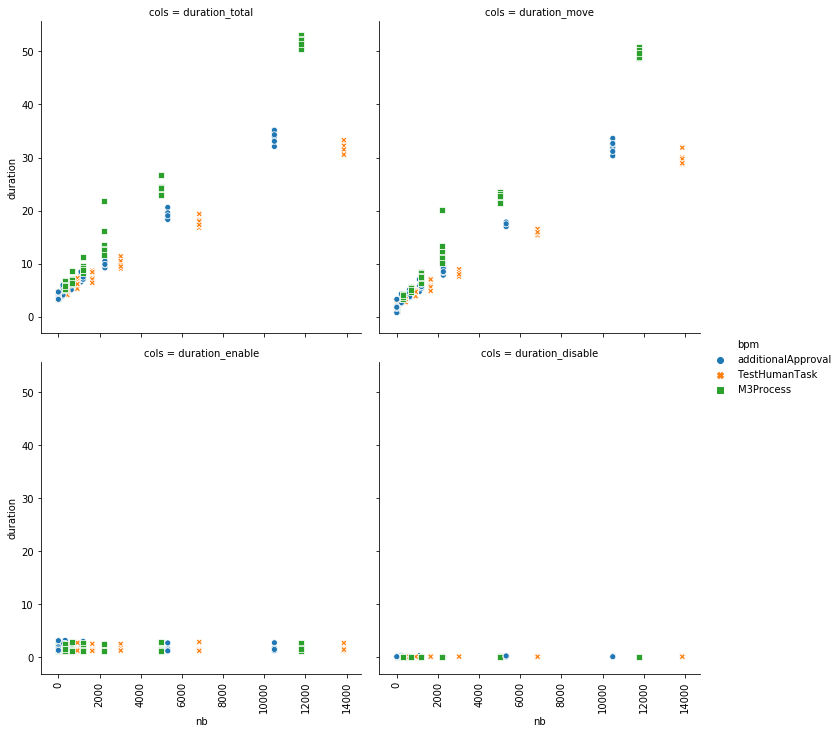

In [58]:
df_migr["index_launch"] = df_migr.groupby(["bpm","nb"]).cumcount()
#df.groupby("nb").mean().plot()
df_nofirst = df_migr[df_migr["index_launch"]>0]
#d = df[["nb","duration_move", "duration_total", "duration_enable", "duration_disable"]].melt('nb', var_name='cols', value_name='duration')
d = df_migr[["bpm", "nb","duration_total", "duration_move", "duration_enable", "duration_disable"]].melt(id_vars=['bpm','nb'], var_name='cols', value_name='duration')
g = sns.relplot(x="nb", y="duration", hue="bpm", kind="scatter",col="cols", data=d,style="bpm",col_wrap=2)
g.set_xticklabels(rotation=90)
#sns.factorplot(x="nb", y="duration", hue="cols", col="bpm", data=d,size=10, kind="point",ci="sd")
#plt.figure()
#d = df_nofirst[["bpm","nb","duration_move", "duration_total", "duration_enable", "duration_disable"]].melt(id_vars=['bpm','nb'], var_name='cols',  value_name='duration')
#g = sns.factorplot(x="nb", y="duration", hue="cols", col="bpm",data=d, kind="point",ci="sd")
#g.set_xticklabels(rotation=90)


/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


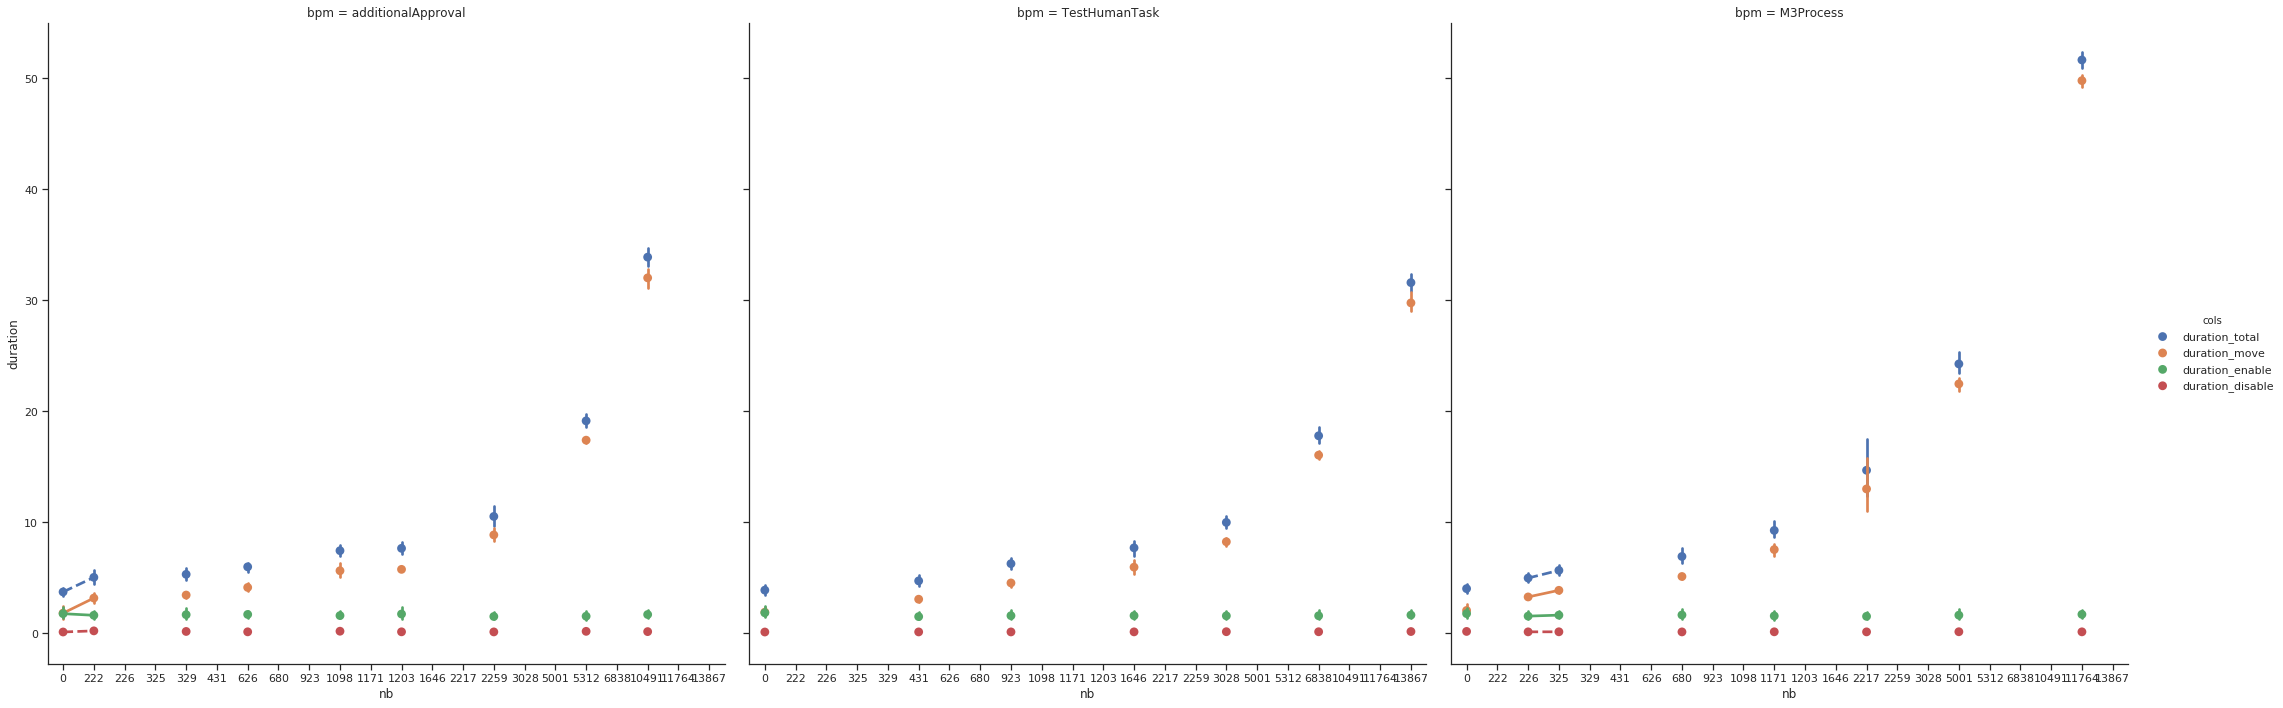

In [59]:
sns.set(style="ticks")
sns.factorplot(x="nb", y="duration", hue="cols", col="bpm", data=d,size=10, linestyles=["--", "-","-","--"])

Text(0.5,1,u'Duration of tenant desactivation')

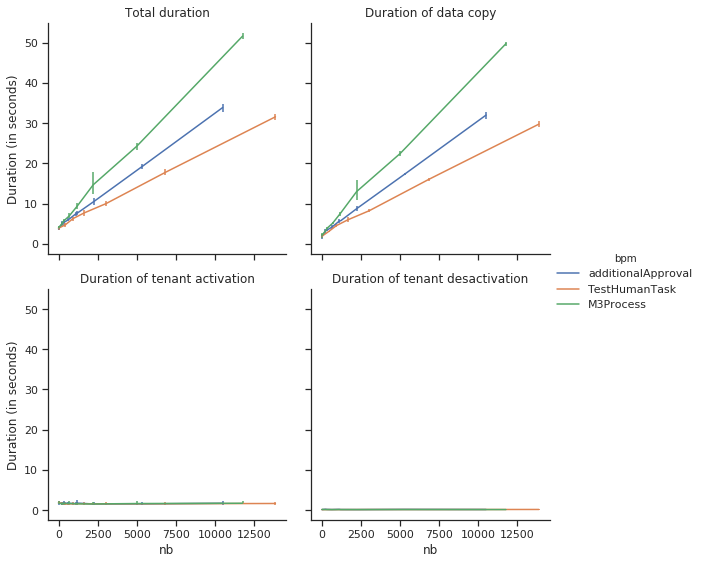

In [96]:
kws = {"ls" : ["-","--","."]}
g = sns.FacetGrid(d, col="cols", col_wrap=2,hue="bpm",size=4, hue_kws={"ls" : ["-","--", "-."]})

g.map(sns.lineplot, "nb", "duration", err_style="bars") .add_legend();
axes = g.axes.flatten()
axes[0].set_title("Total duration")
axes[0].set_ylabel("Duration (in seconds)")
axes[1].set_title("Duration of tenant data copy")
axes[2].set_title("Duration of tenant activation")
axes[2].set_ylabel("Duration (in seconds)")
axes[3].set_title("Duration of tenant desactivation")


In [ ]:
sns.set(style="ticks")
sns.regplot(x="nb", y="duration", hue="cols", col="bpm", data=d,size=10, linestyles=["--", "-","-","--"])

### Desactivation & activation duration + first activation vs the rest
First tenant activation is always longer, desactivation stable

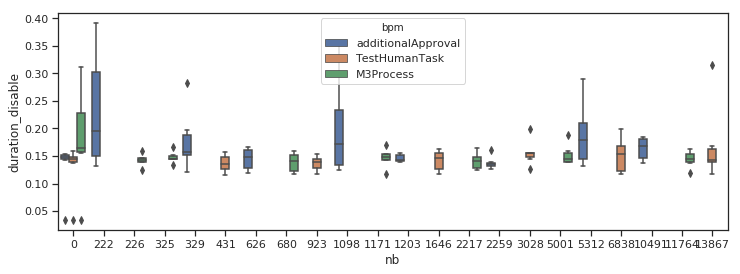

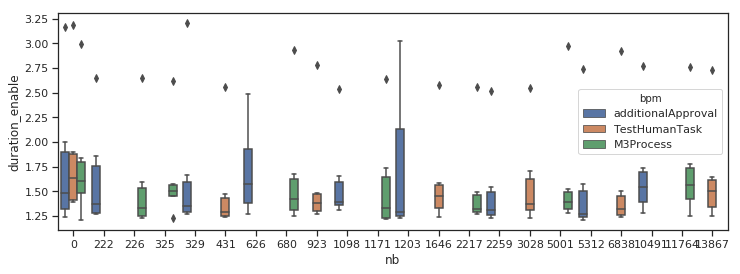

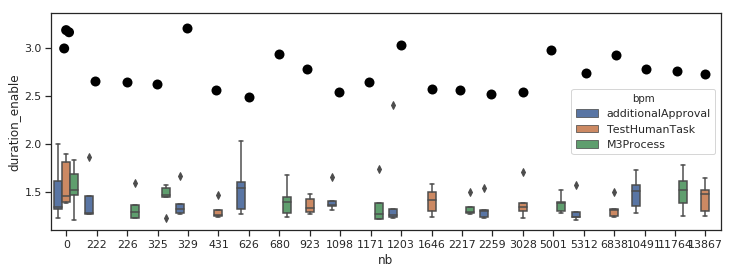

In [68]:

fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_disable", hue="bpm", data=df_migr,ax=ax)
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr)
fig, ax = plt.subplots(figsize=(12,4))


#df[df["index_launch"]>0].boxplot(by="nb", column="duration_enable")
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr[df_migr["index_launch"]>0])
ini_df = df_migr[df_migr["index_launch"]==0]
x = ini_df["nb"]
y = ini_df["duration_enable"]

sns.stripplot(x="nb", y="duration_enable",data=ini_df,  size=10, color="black", edgecolor="gray")


#df.groupby("index_launch").mean().plot(y=["duration_enable", "duration_disable"])

### Boxplot by activation/desactivation number
First activation is always longer

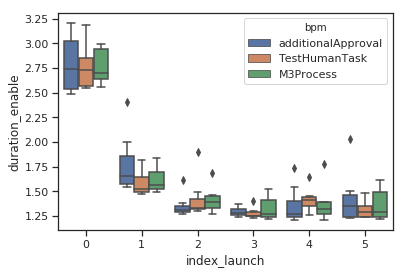

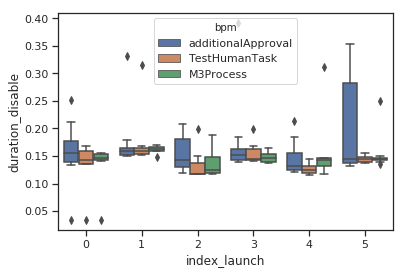

In [69]:

plt.figure()
sns.boxplot(x="index_launch", y="duration_enable", hue="bpm", data=df_migr)
plt.figure()
sns.boxplot(x="index_launch", y="duration_disable", hue="bpm", data=df_migr)

Text(0.5,0,u'Order of the launch')

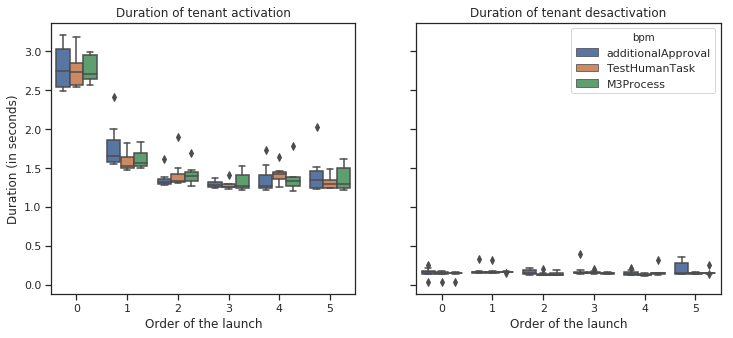

In [97]:

plt.rcParams['figure.figsize'] = (12,5)
fig, axes = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x="index_launch", y="duration_enable", hue="bpm", data=df_migr,ax=axes[0])
axes[0].set_title("Duration of tenant activation")
sns.boxplot(x="index_launch", y="duration_disable", hue="bpm", data=df_migr,ax=axes[1])
axes[1].set_title("Duration of tenant desactivation")
axes[0].legend().remove()
axes[0].set_ylabel("Duration (in seconds)")
axes[1].set_ylabel("")
axes[0].set_xlabel("Order of the launch")
axes[1].set_xlabel("Order of the launch")

